In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

In [7]:
# Open the file with the data
# df = pd.read_csv('servicos.csv', sep=';')
df = pd.read_csv("servicos_atualizado.csv")
df.dropna(inplace=True)
df.head()

,id,tags,taken,latitude,longitude,accuracy,Tipo de análise,1,2,3,...,5,6,7,8,9,10,11,12,n_sec,secs
0,241150943,building | city | city skyline | city view | f...,11/9/2006 23:26,"-19,950054","-43,908405",140,Levantamento e Mapeamento dos SEC,1,1,0,...,0,0,0,0,0,0,0,0,1,2
1,241150968,city | hill | hillside | mound | mountain | peak,11/9/2006 23:26,"-19,950054","-43,908405",140,Levantamento e Mapeamento dos SEC,1,1,0,...,0,0,0,0,0,0,0,0,2,"1,2"
2,241151010,dry | field | grass | grassy | sky | weed,11/9/2006 23:27,"-19,950054","-43,908405",140,Levantamento e Mapeamento dos SEC,0,0,1,...,0,0,0,0,0,0,0,0,1,3
3,241151052,city | city view | hill | hillside | mountain ...,11/9/2006 23:27,"-19,950114","-43,908619",140,Levantamento e Mapeamento dos SEC,1,1,0,...,0,0,0,0,0,0,0,0,3,"1,2,4"
4,241151101,bud | dry | flower | grow | hill | hillside | ...,11/9/2006 23:29,"-19,95084","-43,908233",130,Levantamento e Mapeamento dos SEC,0,0,1,...,0,0,0,0,0,0,0,0,1,3


In [8]:
# Create a bag of words and a matrix representing if that word is in the text
bag_of_words = set()
for row in df["tags"]:
    for word in row.replace(" ", "").split("|"):
        bag_of_words.add(word)

bag_of_words = list(bag_of_words)
bag_of_words.sort()
len(bag_of_words)

253

In [60]:
# Create a bag of words to represent the classes
classes = set()
for row in df["secs"]:
    for classe in row.replace(" ", "").split(","):
        classes.add(int(classe))

classes = list(classes)
classes.sort()
classes = [str(classe) for classe in classes]
classes

['1', '2', '3', '4', '6', '8', '10', '11', '12']

In [61]:
# Create a matrix where each row is a text and each column is a word
matrix = []
for row in df["tags"]:
    matrix.append([1 if word in row.replace(" ", "").split("|") else 0 for word in bag_of_words])

matrix = np.array(matrix)

In [62]:
matrix.shape

(189, 253)

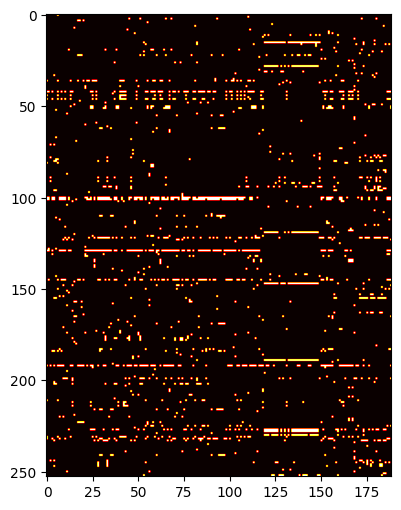

In [63]:
# Vizualize the matrix as a image
import matplotlib.pyplot as plt
# Size of the image 10x10
plt.figure(figsize=(6,6))
plt.imshow(matrix.T, cmap='hot')
plt.show()

In [64]:
servicos = []
for row in df["secs"]:
    servicos.append([1 if classe in row.replace(" ", "").split(",") else 0 for classe in classes])

servicos = np.array(servicos)
servicos.shape
servicos

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [109]:
soma = np.zeros(len(servicos[0]))
for i in range(len(servicos)):
    soma += servicos[i]

soma

array([82., 62., 58., 13.,  1.,  1.,  4.,  7.,  7.])

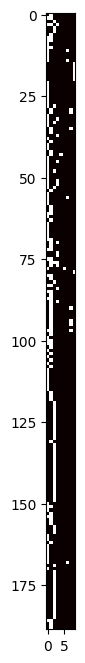

In [65]:
# Size of the image 10x10
plt.figure(figsize=(8,8))
plt.imshow(servicos, cmap='hot')
plt.show()

In [92]:
# Split the data in train and test
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier

X_train, X_test, y_train, y_test = train_test_split(matrix, servicos, test_size=0.33)
randon_forest = MultiOutputClassifier(RandomForestClassifier(n_estimators=100)).fit(X_train,y_train)

# Predict the test data
y_pred = randon_forest.predict(X_test)

In [93]:
soma = np.zeros(len(y_train[0]))
for i in range(len(y_train)):
    soma += y_train[i]

soma

array([51., 42., 45.,  8.,  1.,  0.,  3.,  5.,  4.])

In [94]:
soma = np.zeros(len(y_test[0]))
for i in range(len(y_test)):
    soma += y_test[i]

soma

array([31., 20., 13.,  5.,  0.,  1.,  1.,  2.,  3.])

In [96]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
for i in range(0, len(classes)):
    print(classes[i], accuracy_score(y_test[:,i], y_pred[:,i]))

1 0.7142857142857143
2 0.8571428571428571
3 1.0
4 0.9682539682539683
6 1.0
8 0.9841269841269841
10 0.9841269841269841
11 0.9841269841269841
12 0.9841269841269841


In [97]:
randon_forest.estimators_

[RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier()]

In [98]:
for i in range(0, len(classes)):
    
    # Feature importance in the model
    importances = randon_forest.estimators_[i].feature_importances_
    std = np.std([tree.feature_importances_ for tree in randon_forest.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]
    print("%s) " % classes[i], end=" ")
    # Print the feature ranking
    for f in range(0, 10):
        print("%d. %s (%f) " % (f + 1, bag_of_words[indices[f]], importances[indices[f]]), end="\t")
    print("")

1)  1. mountain (0.103404) 	2. sky (0.062662) 	3. scenery (0.029445) 	4. hill (0.024291) 	5. perch (0.020365) 	6. hillside (0.020294) 	7. sit (0.020004) 	8. city (0.018958) 	9. bird (0.017996) 	10. peak (0.016664) 	
2)  1. valley (0.082421) 	2. city (0.080973) 	3. scenery (0.056732) 	4. hill (0.048503) 	5. peak (0.042969) 	6. cityview (0.036612) 	7. hillside (0.026204) 	8. lake (0.025858) 	9. surround (0.022799) 	10. cityskyline (0.022018) 	
3)  1. mountain (0.064589) 	2. sit (0.060044) 	3. bird (0.049934) 	4. branch (0.048145) 	5. tree (0.043464) 	6. perch (0.041606) 	7. plant (0.041273) 	8. limb (0.037954) 	9. treebranch (0.032875) 	10. hill (0.032759) 	
4)  1. rocky (0.181884) 	2. stone (0.113461) 	3. rockformation (0.106618) 	4. rockface (0.068457) 	5. boulder (0.064419) 	6. cliff (0.046537) 	7. stump (0.034068) 	8. stand (0.021824) 	9. city (0.020970) 	10. terrain (0.019432) 	
6)  1. stool (0.218924) 	2. ledge (0.129301) 	3. urban (0.096721) 	4. walk (0.075288) 	5. sun (0.067869) 

In [108]:
#  Columns =["id", "model_identified_tags"])
serra_null_gps = pd.read_csv("serra_tags_null_gps.csv", sep=";")
serra_null_gps = serra_null_gps[["id", "model_identified_tags"]]
serra_null_gps

,id,model_identified_tags
0,52904733325,barrel | basement | beam | ceiling | container...
1,9241659630,balustrade | city | city view | hill | hillsid...
2,15187099604,bird | branch | brown | log | peak | perch | p...
3,2123658330,blanket | cloud | cloudy | green | hill | hill...
4,52904796013,bicycle | bicycle helmet | biker | dirt track ...
...,...,...
3082,9860799366,daisy | flower | grass | grow | plant | stem |...
3083,4793139481,backdrop | building | city | city skyline | ci...
3084,51131866624,blue | bud | floor | flower | grass | grow | p...
3085,15787763770,bloom | flower | grow | pink | plant | tree


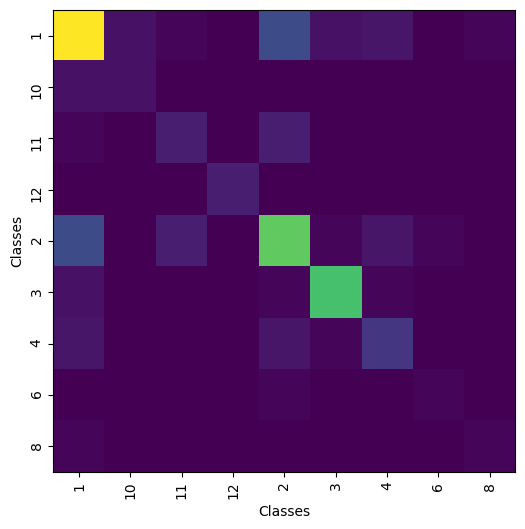

In [38]:
# For each row in servicos, count the number of interactions between the classes
interacao = np.zeros((servicos.shape[1], servicos.shape[1]))
for row in servicos:
    for i in range(len(row)):
        for j in range(len(row)):
            if row[i] == 1 and row[j] == 1:
                interacao[i][j] += 1

plt.figure(figsize=(6,6))
plt.xlabel("Classes")
plt.xticks(range(len(classes)), classes, rotation=90)
plt.ylabel("Classes")
plt.yticks(range(len(classes)), classes, rotation=90)
plt.imshow(interacao, cmap='viridis')
plt.show()

In [39]:
# Get diagonal from interacao
diagonal = np.array([interacao[i][i] for i in range(len(interacao))])
diagonal

array([82.,  4.,  7.,  7., 62., 58., 13.,  1.,  1.])

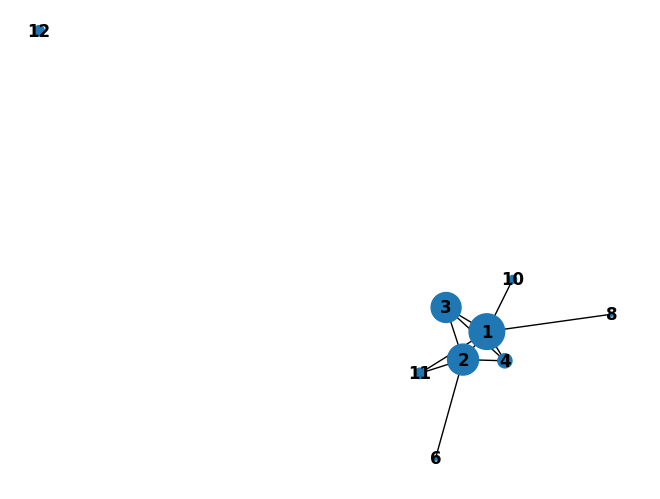

In [40]:
import networkx as nx

np.fill_diagonal(interacao, 0)
G = nx.from_numpy_array(interacao)

# Relable the nodes to the classes names
mapping = {i:classes[i] for i in range(len(classes))}
G = nx.relabel_nodes(G, mapping)
nx.draw(G, with_labels=True, font_weight='bold', node_size=diagonal*8)

